# 한국 부동산 데이터 시각 경진대회

https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## 지역별 지가 변동률

In [3]:
# 데이터 로드
region=pd.read_csv('data/realestate/지역별_지가변동률.csv',parse_dates=True)
region.shape

(194, 19)

In [4]:
region.head()

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247


In [5]:
# 데이터 타입 확인
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    object 
 1   전국[%]       194 non-null    float64
 2   서울[%]       194 non-null    float64
 3   부산[%]       194 non-null    float64
 4   대구[%]       194 non-null    float64
 5   인천[%]       194 non-null    float64
 6   광주[%]       194 non-null    float64
 7   대전[%]       194 non-null    float64
 8   울산[%]       194 non-null    float64
 9   세종[%]       104 non-null    float64
 10  경기[%]       194 non-null    float64
 11  강원[%]       194 non-null    float64
 12  충북[%]       194 non-null    float64
 13  충남[%]       194 non-null    float64
 14  전북[%]       194 non-null    float64
 15  전남[%]       194 non-null    float64
 16  경북[%]       194 non-null    float64
 17  경남[%]       194 non-null    float64
 18  제주[%]       194 non-null    float64
dtypes: float64(18), object(1)
mem

In [6]:
# object타입의 날짜 컬럼을 date타입으로 변경 후 컬럼명 변경
region.iloc[:,0]=pd.to_datetime(region.iloc[:,0])
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  194 non-null    datetime64[ns]
 1   전국[%]       194 non-null    float64       
 2   서울[%]       194 non-null    float64       
 3   부산[%]       194 non-null    float64       
 4   대구[%]       194 non-null    float64       
 5   인천[%]       194 non-null    float64       
 6   광주[%]       194 non-null    float64       
 7   대전[%]       194 non-null    float64       
 8   울산[%]       194 non-null    float64       
 9   세종[%]       104 non-null    float64       
 10  경기[%]       194 non-null    float64       
 11  강원[%]       194 non-null    float64       
 12  충북[%]       194 non-null    float64       
 13  충남[%]       194 non-null    float64       
 14  전북[%]       194 non-null    float64       
 15  전남[%]       194 non-null    float64       
 16  경북[%]       194 non-null  

In [7]:
# 지역컬럼명의 % 를 제거
region.rename(columns=lambda x: x[:-3], inplace=True)
region.columns

Index(['Unnamed', '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype='object')

In [8]:
# 날짜컬럼명 변경
region=region.rename({'Unnamed':'날짜'},axis='columns')
region.columns

Index(['날짜', '전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype='object')

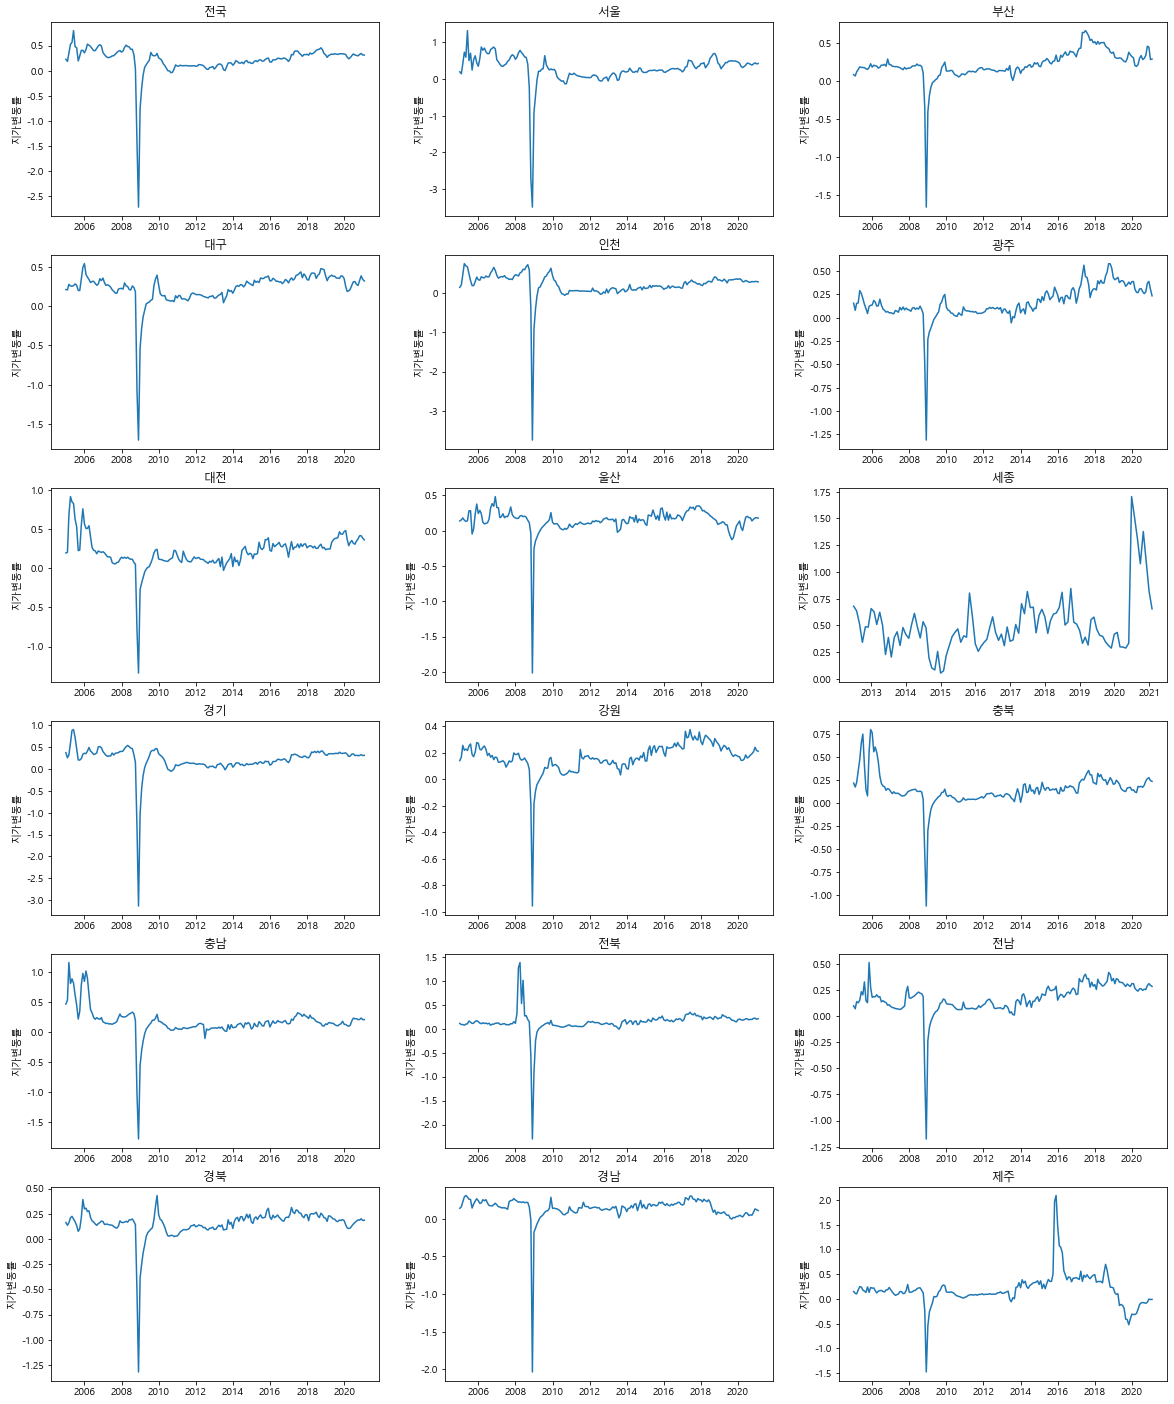

In [29]:
#각 지역별 지가 변동률과 전국 지가변동률 표현
plt.figure(figsize=(20,25))
tempre=region.columns[1:]
for i in enumerate(tempre):
    plt.subplot(6,3,i[0]+1)
    plt.plot(region['날짜'],region[i[1]])
    plt.title(i[1])
    plt.ylabel("지가변동률")